In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
trainpd=pd.read_csv("bill_authentication.csv")
xtrain=trainpd[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
ytrain=trainpd[['Class']]
#xtrain=trainpd.drop(['Class'],axis=1)
trainpd.tail(2)


Variance  Skewness  Curtosis  Entropy  Class
1370   -3.5637  -8.38270   12.3930  -1.2823      1
1371   -2.5419  -0.65804    2.6842   1.1952      1

In [83]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor(random_state=0,max_depth=3)
tree_model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [49]:
#prediction using the model
prediction0=tree_model.predict([(4.5459,8.1674,-2.4586,-1.46210)])
prediction1=tree_model.predict([(-3.5637,-8.38270,12.3930,-1.2823)])


In [50]:
print(prediction0)
print(prediction1)

[0.06686478]
[0.92934783]


In [58]:
#features important , that determine und controlle the y
#imagine that we have 6 independent variables(x1,x2,x3,...), and 1 dependent variable(y)
# every x bewirkt sich auf y in different  manner
importances=tree_model.feature_importances_
print(importances*100)

[71.59002533 20.34325016  8.06672451  0.        ]


In [73]:
Names =list(xtrain.columns.values)
for f in range(xtrain.shape[1]):
    print(Names[f],importances[f])
    

Variance 0.7159002532790997
Skewness 0.2034325015773626
Curtosis 0.08066724514353768
Entropy 0.0


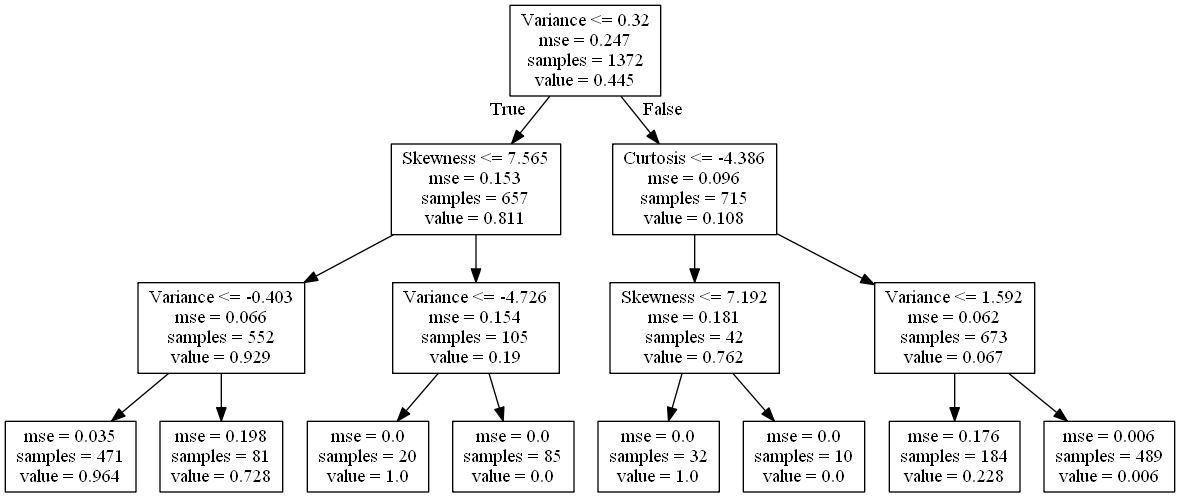

In [87]:
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus
from IPython.display import Image
#create DOT DATA
dot_data=tree.export_graphviz(tree_model,feature_names=Names)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [86]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':10})
fig,axes=plt.subplots(nrows=1, ncols=1,figsize=(10,4),dpi=4000)
tree.plot_tree(tree_model,feature_names=Names,filled=True)
fig.savefig('Tree_photo.png')